## Linear Regression Sample Project

<strong>Context </strong>

The project is for an unnamed Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired me on contract to help them figure it out! 
Let's get started!


<strong>Imports </strong>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customer_data = pd.read_csv('Ecommerce Customers')

In [3]:
customer_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customer_data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 25.4+ KB


**Exploratory Data Analysis**

A comparison of the Time on Website vs. Yearly Amount Spent columns; Time on App vs. Yearly Amount Spent columns; Time on App vs. Length of Membership

C:\Users\Rich\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rich\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


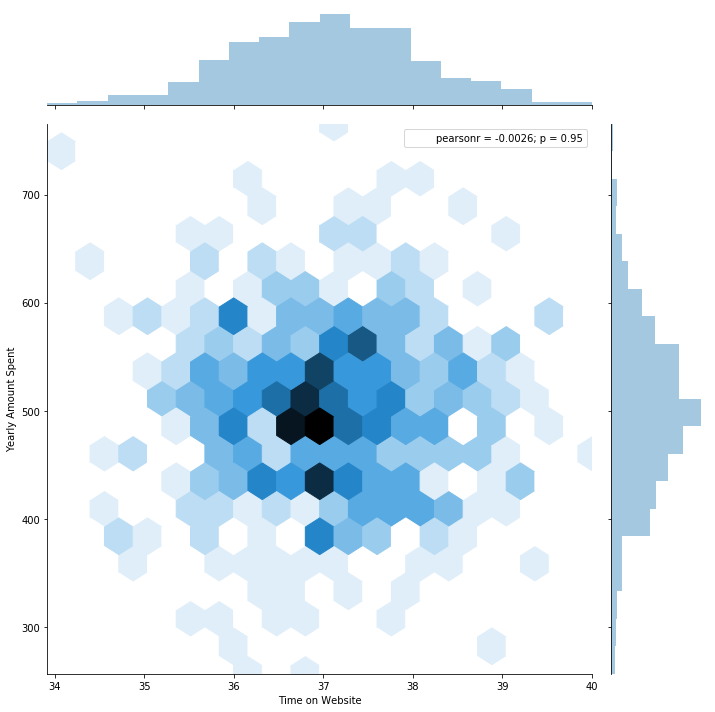

In [6]:

sns.jointplot('Time on Website', 'Yearly Amount Spent', data=customer_data, kind='hexbin',size=10)

C:\Users\Rich\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rich\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


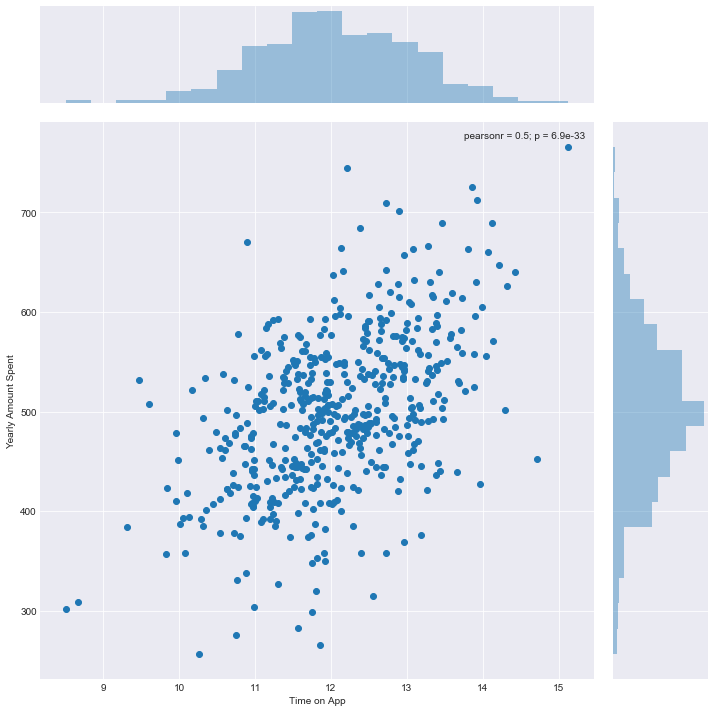

In [7]:
sns.set_style(style='darkgrid')
sns.jointplot('Time on App','Yearly Amount Spent',data=customer_data, size=10)

C:\Users\Rich\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rich\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


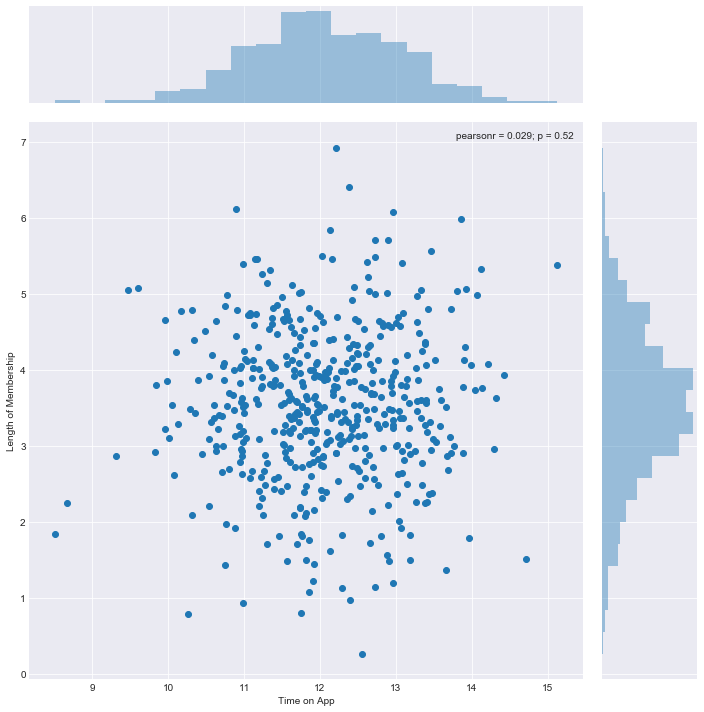

In [8]:
sns.jointplot('Time on App','Length of Membership',data=customer_data, size=10)

The relationshps accross the entire data set

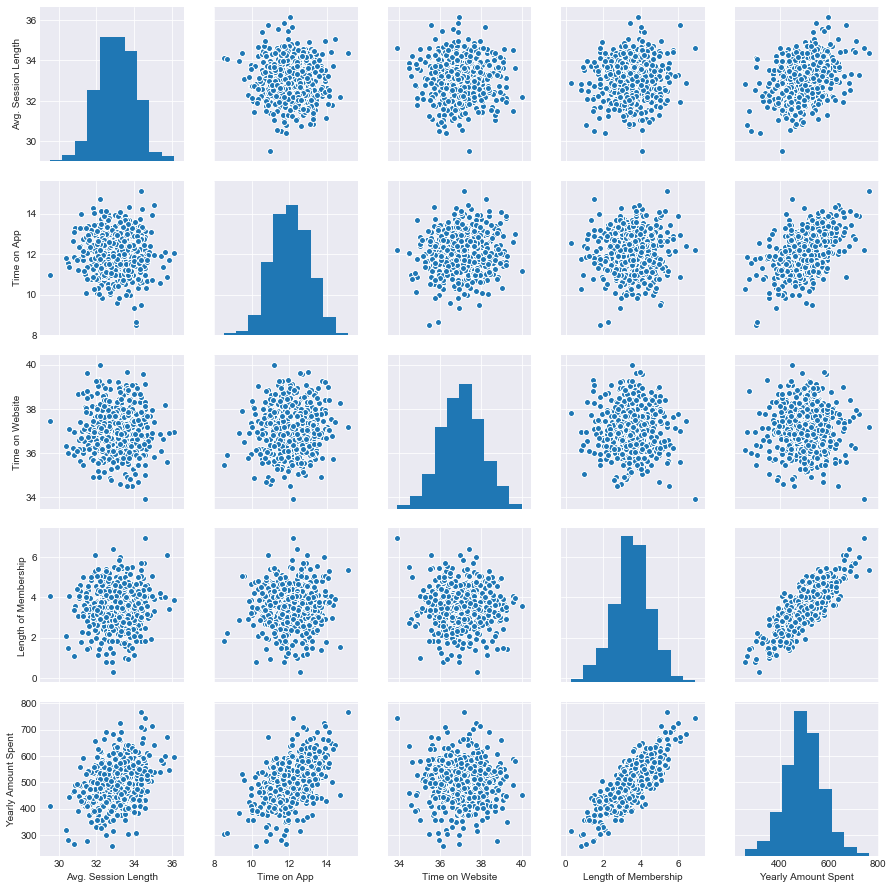

In [9]:
sns.pairplot(customer_data, size=2.5)

The Lenght of Memebership and Yearly Amount Spent appear to be very corelated 

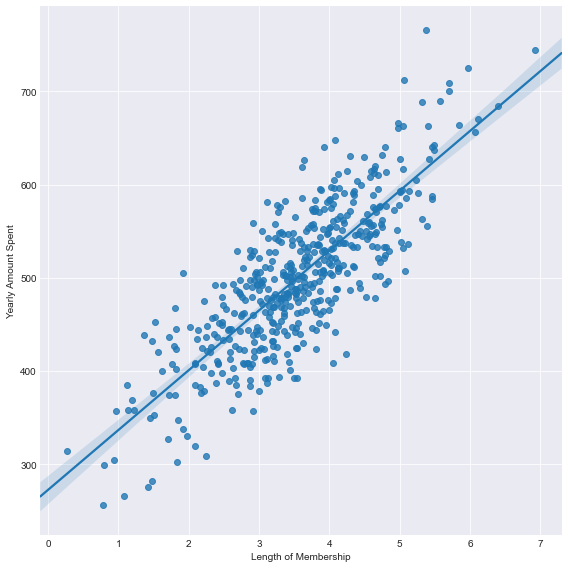

In [10]:
sns.lmplot('Length of Membership', 'Yearly Amount Spent',data= customer_data, size=8)

**Splitting up the data**

In [11]:
from sklearn.cross_validation import train_test_split

C:\Users\Rich\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
'''The Features or the Indipendent variables''' 
x = customer_data[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership' ]]

In [13]:
'''The target or the dependent variable'''
y = customer_data['Yearly Amount Spent']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=52)

**Training the model and Predicting the dependent variable**

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lm.intercept_

-1069.352622678676

In [18]:
prediction = lm.predict(x_test)

**Model Evaluation**

In [19]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, prediction)

7.84105662610271

In [20]:
MAE = metrics.mean_absolute_error(y_test, prediction)
MSE = metrics.mean_squared_error(y_test, prediction)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, prediction))
R_squared = metrics.r2_score(y_test, prediction)
print(f'Mean Absolute Error: {MAE}')
print(f'Mean Squared Error: {MSE}')
print(f'Root Mean Squared Error: {RMSE}')
print(f'R2: {R_squared}')

Mean Absolute Error: 7.84105662610271
Mean Squared Error: 97.79682731661578
Root Mean Squared Error: 9.889227842284543
R2: 0.9829527512424625


Residuals

In [21]:
residuals = y_test - prediction

C:\Users\Rich\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


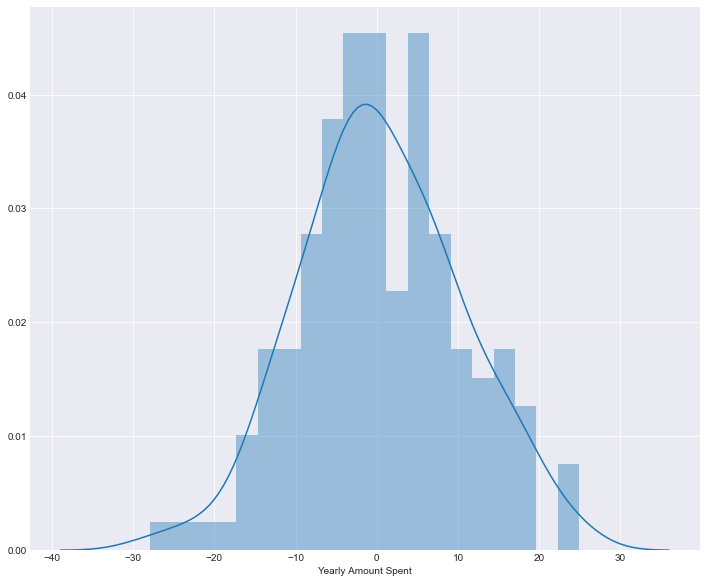

In [22]:
plt.figure(figsize=(12, 10))
sns.distplot(residuals, bins=20)

**Conclusion**

We need the coefficients to finally answer the initial question 

In [23]:
lm.coef_

array([25.90942019, 39.1784584 ,  0.65639786, 61.01480155])

In [24]:
coefficients = pd.DataFrame(lm.coef_, index=x_train.columns, columns=['Coefs'] )
coefficients

,Coefs
Avg. Session Length,25.909420
Time on App,39.178458
Time on Website,0.656398
Length of Membership,61.014802


- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.91 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 39.18 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.66 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.01 total dollars spent**.

Therefore holding all other factors fixed the company should focus more on the App